[HILIC POSITIVE ION MODE data matrix](https://www.metabolomicsworkbench.org/data/showfile_t.php?RA=18.10.65.3&DF=MSdata_ST001192_1.txt)

[HILIC + ion mode all data/metadata in mwTab text format](https://www.metabolomicsworkbench.org/data/study_textformat_view.php?STUDY_ID=ST001192&ANALYSIS_ID=AN001984)

[HILIC + ion mode all data/metadata in mwTab JSON format](https://www.metabolomicsworkbench.org/data/study_textformat_view.php?JSON=YES&STUDY_ID=ST001192&ANALYSIS_ID=AN001984)

[ALL mwTab text format](https://www.metabolomicsworkbench.org/data/study_textformat_list.php?STUDY_ID=ST001192&STUDY_TYPE=MS&RESULT_TYPE=5)

[ALL mwTab JSON format](https://www.metabolomicsworkbench.org/data/study_textformat_list.php?JSON=YES&STUDY_ID=ST001192&STUDY_TYPE=MS&RESULT_TYPE=5)

[ALL data matrix](https://www.metabolomicsworkbench.org/data/data_table_output.php?STUDY_ID=ST001192&STUDY_TYPE=MS&RESULT_TYPE=5)

Preferable load the data matrix directly? not sure, but I image that the data with metadata can take a bit of extra work to parse out the other info.

In [148]:
import scipy as sp
from pylab import *
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import collections
from IPython.display import clear_output
import random
import urllib.request
import pandas as pd

In [118]:
HILIC_pos_txt ="https://www.metabolomicsworkbench.org/data/showfile_t.php?RA=18.10.65.3&DF=MSdata_ST001192_1.txt"
data = urllib.request.urlopen(HILIC_pos_txt)
#there are space in the species name! 
df = pd.DataFrame() 

for line in data:
    line = line.decode('iso-8859-1') # decode the byte array into a string, 
    line = line.split()
    
    # for row in range(n_rows):
    if len(line) > 2:
        for i, element in enumerate(line):
            try:
                line[i] = float(element)
            except ValueError:
                line[i] = element
        if not isinstance(line[1], (int, float)) and '-' not in line[1]:
            line[0] = str(line[0]) +' '+ str(line[1])
            for i in range(1, len(line)-2):
                line[i] = line[i + 1]
            line.pop()           
        subset_df = pd.DataFrame(line[1:], columns=[line[0]])
        df = pd.concat([df, subset_df], axis=1)

In [119]:
display(df)

,Samples,Factors,1_2_4-trimethylbenzene,1-methyladenosine,1-methylguanosine/2-O-methylguanosine,1-methylhistamine,1-methylnicotinamide,2-deoxyadenosine,2-deoxycytidine,2^-O-methyladenosine/3^-O-methyladenosine,...,thymidine,trimethylamine-N-oxide,tryptophan,tyramine,tyrosine,urocanic acid,valine,valine-d8,xanthine,xanthosine
0,aa-0163,Diet:-,8584.0,2056.0,3774.0,3925.0,2028.0,378414.0,5233.0,545.0,...,13528.0,5210.0,32593.0,62429.0,43299.0,303622.0,25850500.0,60311.0,41041.0,38071.0
1,ab-0140,Diet:-,11454.0,1023.0,1986.0,34985.0,2023.0,76221.0,2697.0,305.0,...,8014.0,4390.0,32531.0,54155.0,40754.0,93419.0,82499985.0,42272.0,90012.0,69589.0
2,ac-0002,Diet:-,8558.0,461.0,1475.0,2409.0,2108.0,936330.0,3470.0,32.0,...,29482.0,4079.0,46403.0,42806.0,55148.0,601287.0,60440857.0,50616.0,109149.0,72461.0
3,ad-0002,Diet:-,6111.0,309.0,910.0,541.0,1509.0,120817.0,5273.0,41.0,...,22111.0,4645.0,46660.0,55685.0,49904.0,185504.0,38155671.0,57854.0,32509.0,25388.0
4,ad-0005,Diet:-,6356.0,577.0,1585.0,1111.0,2285.0,110166.0,3775.0,78.0,...,25226.0,5811.0,32155.0,54034.0,25892.0,67706.0,37700812.0,56886.0,50833.0,35368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,cy-0019,Diet:Vegetarian,6997.0,1367.0,546.0,4054.0,2471.0,NaN,1734.0,NaN,...,4979.0,6924.0,5357.0,54226.0,4420.0,16195.0,5800589.0,53902.0,10450.0,11147.0
176,cy-0037,Diet:Vegetarian,7370.0,1234.0,789.0,2377.0,3030.0,NaN,2138.0,NaN,...,9203.0,6773.0,14903.0,48013.0,9005.0,8104.0,10187979.0,56655.0,28433.0,29351.0
177,dd-0041,Diet:Vegetarian,7179.0,1367.0,2092.0,522.0,1799.0,NaN,3192.0,NaN,...,21319.0,4454.0,22926.0,47255.0,21746.0,90186.0,23711714.0,56421.0,68482.0,43963.0
178,dj-0001,Diet:Vegetarian,3691.0,15543.0,4274.0,NaN,7183.0,NaN,771.0,NaN,...,6748.0,6541.0,5127.0,42895.0,4705.0,22228.0,218081410.0,51932.0,4157.0,6750.0


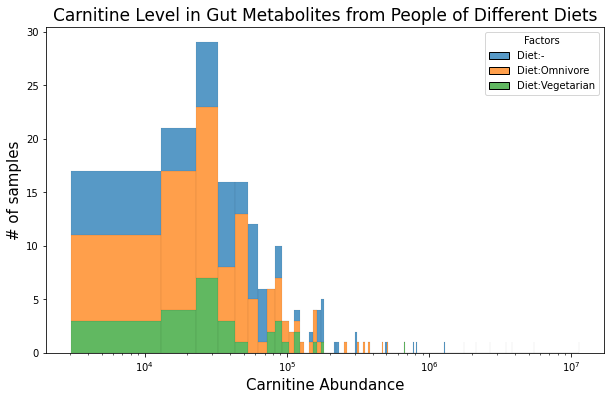

In [142]:
fig = figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="carnitine", hue="Factors", multiple="stack", binwidth=10000)
ax.set_xscale('log')
plt.title('Carnitine Level in Gut Metabolites from People of Different Diets', size = 17)
plt.xlabel("Carnitine Abundance", size = 15)
plt.ylabel("# of samples", size = 15)
plt.show()